<a href="https://www.kaggle.com/code/kursatdinc/advanced-functional-eda?scriptVersionId=179017689" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **ADVANCED FUNCTIONAL EDA**

1. General Check of DataFrame
1. Capturing Variables and Generalizing Operations
1. Analysis of Categorical Variables
1. Analysis of Numerical Variables
1. Analysis of Target Variable
1. Analysis of Correlation

#### **IMPORTINGS**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

#### **SAMPLE DATA FRAME**

In [2]:
df = pd.read_csv("/kaggle/input/test-file/tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### **GENERAL CHECK OF DATAFRAME**

In [3]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

**EXAMPLE**

In [4]:
check_df(df, head=10)

##################### Shape #####################
(418, 12)
##################### Types #####################
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
##################### Head #####################
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   
5          897         0       3   
6          898         1       3   
7          899         0       2   
8          900         1       3   
9          901         0       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0

#### **CAPTURING VARIABLES & GENERALIZING OPERATIONS**

In [5]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    
    return cat_cols, num_cols, cat_but_car

**EXAMPLE**

In [6]:
grab_col_names(df, cat_th=10, car_th=20)

Observations: 418
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


(['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch'],
 ['PassengerId', 'Age', 'Fare'],
 ['Name', 'Ticket', 'Cabin'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


#### **ANALYSIS OF CATEGORICAL VARIABLES**

In [8]:
def cat_summary(dataframe, col_name, plot=False):

    if dataframe[col_name].dtypes == "bool":
        dataframe[col_name] = dataframe[col_name].astype(int)

        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

        if plot:
            fig, axs = plt.subplots(1, 2, figsize=(8, 6))

            plt.subplot(1, 2, 1)
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.title("Frequency of " + col_name)
            plt.xticks(rotation=90)

            plt.subplot(1, 2, 2)
            values = dataframe[col_name].value_counts()
            plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
            plt.title("Frequency of " + col_name)
            plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                    loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
            plt.show(block=True)
    else:
        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

        if plot:
            fig, axs = plt.subplots(1, 2, figsize=(8, 6))
            
            plt.subplot(1, 2, 1)
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.title("Frequency of " + col_name)
            plt.xticks(rotation=90)

            plt.subplot(1, 2, 2)
            values = dataframe[col_name].value_counts()
            plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
            plt.title("Frequency of " + col_name)
            plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                    loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
            plt.show(block=True)

**EXAMPLE**

          Embarked      Ratio
Embarked                     
S              270  64.593301
C              102  24.401914
Q               46  11.004785
##########################################


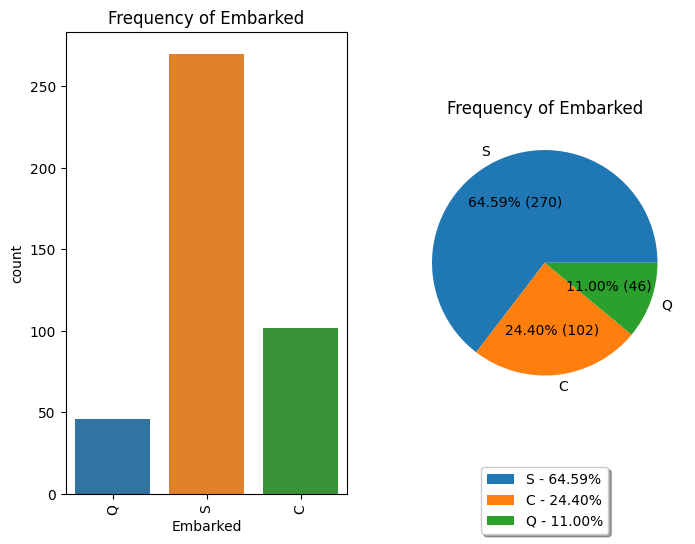

In [9]:
cat_summary(df, "Embarked", plot=True)

#### **ANALYSIS OF NUMERICAL VARIABLES**

In [10]:
def num_summary(dataframe, numerical_col, plot=False, hist_bins=20):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(12, 10))
        
        # Histogram
        plt.subplot(1, 2, 1)
        dataframe[numerical_col].hist(bins=hist_bins)
        plt.xlabel(numerical_col)
        plt.title(numerical_col + ' Distribution')
        
        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=numerical_col, data=dataframe)
        plt.title("Boxplot of " + numerical_col)
        plt.xticks(rotation=90)
        
        plt.tight_layout()
        plt.show(block=True)

**EXAMPLE**

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
5%         7.229200
10%        7.641680
20%        7.795800
30%        8.050000
40%       11.024980
50%       14.454200
60%       21.437520
70%       26.550000
80%       46.620000
90%       79.200000
95%      151.550000
99%      262.375000
max      512.329200
Name: Fare, dtype: float64


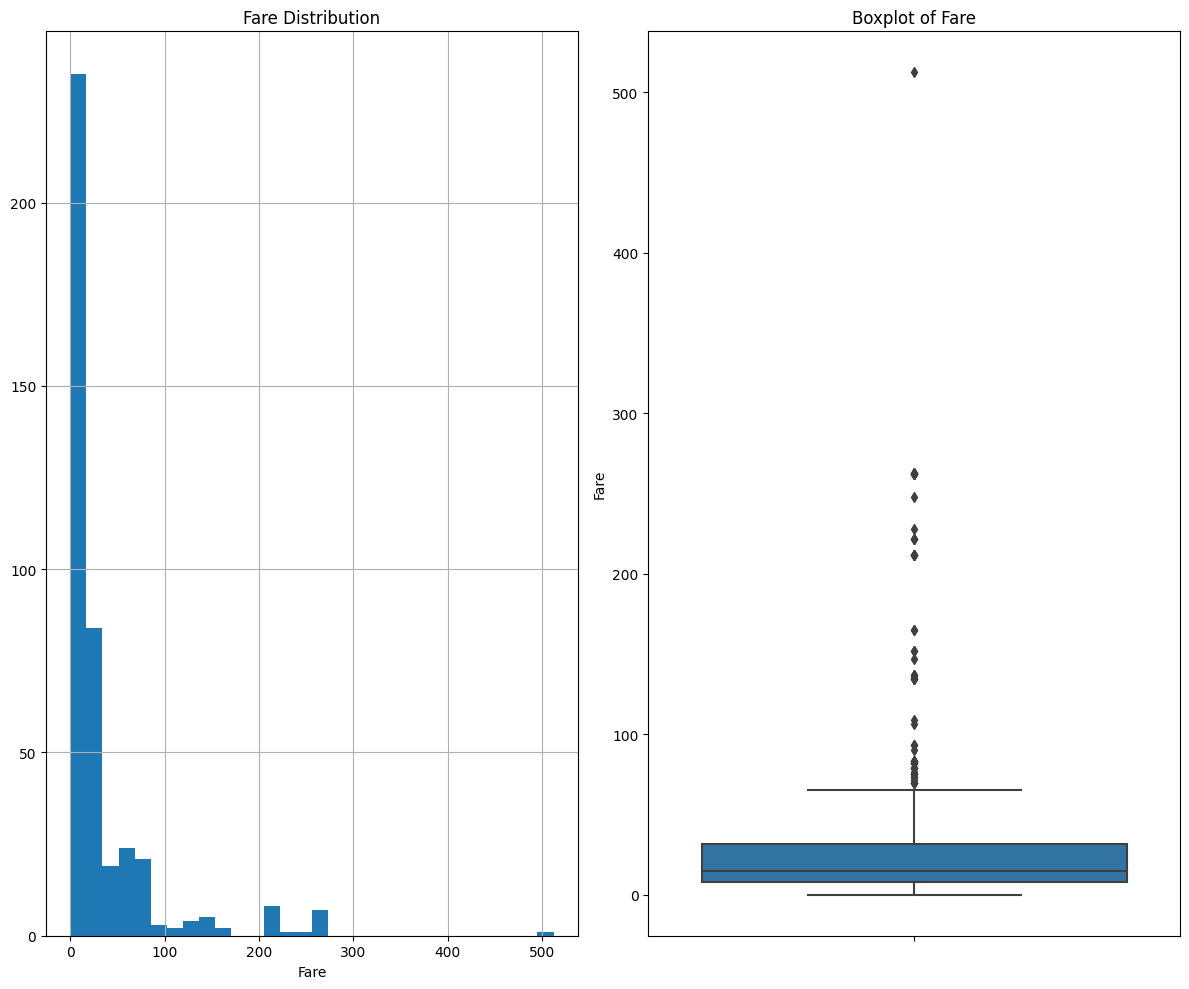

In [11]:
num_summary(df, "Fare", plot=True, hist_bins=30)

#### **ANALYSIS OF TARGET VARIABLE**

In [12]:
def target_summary_with_cat(dataframe, target, categorical_col):
    """

        Veri setindeki Target colonunu, girilen kategorik colona gore gruplayip
            - mean
            - count
            - ratio
        sonuclarini ekrana yazdirir.

        Parameters
        ------
            dataframe: dataframe
                    Target ve Kategorik kolonlarin bulundugu dataframe
            target: str
                    Sonucun getirilecegi hedef degisken
            categorical_col: str
                    Gruplanmak istenen kategorik kolon

        Returns
        ------
            None

        Examples
        ------
            import pandas as pd
            in:
            df = pd.DataFrame({'Animal': ['Falcon', 'Falcon', 'Falcon',
                                          'Parrot', 'Parrot'],
                               'Max Speed': [310, 330, 340, 24, 28]})

            in:
            df
            out:
              Animal   Max Speed
            0  Falcon  310
            1  Falcon  330
            2  Falcon  340
            3  Parrot   24
            4  Parrot   28

            in: target_summary_with_cat_extended(df, 'Max Speed', 'Animal')
            out:
                    TARGET_MEAN  TARGET_CCOUNT  RATIO
            Animal
            Falcon 326.6667      3             60.0000
            Parrot  26.0000      2             40.0000

        Notes
        ------
            None

        """

    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "TARGET_COUNT": dataframe.groupby(categorical_col)[target].count(),
                        "RATIO": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}), end="\n\n\n")

**EXAMPLE**

In [13]:
target_summary_with_cat(df, "Survived", "Embarked")

          TARGET_MEAN  TARGET_COUNT      RATIO
Embarked                                      
C            0.392157           102  24.401914
Q            0.521739            46  11.004785
S            0.325926           270  64.593301




In [14]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

**EXAMPLE**

In [15]:
target_summary_with_num(df, "Survived", "Fare")

               Fare
Survived           
0         27.527877
1         49.747699




#### **ANALYSIS OF CORRELATION**

In [16]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr(numeric_only=True)
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set_theme(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list

**EXAMPLE**

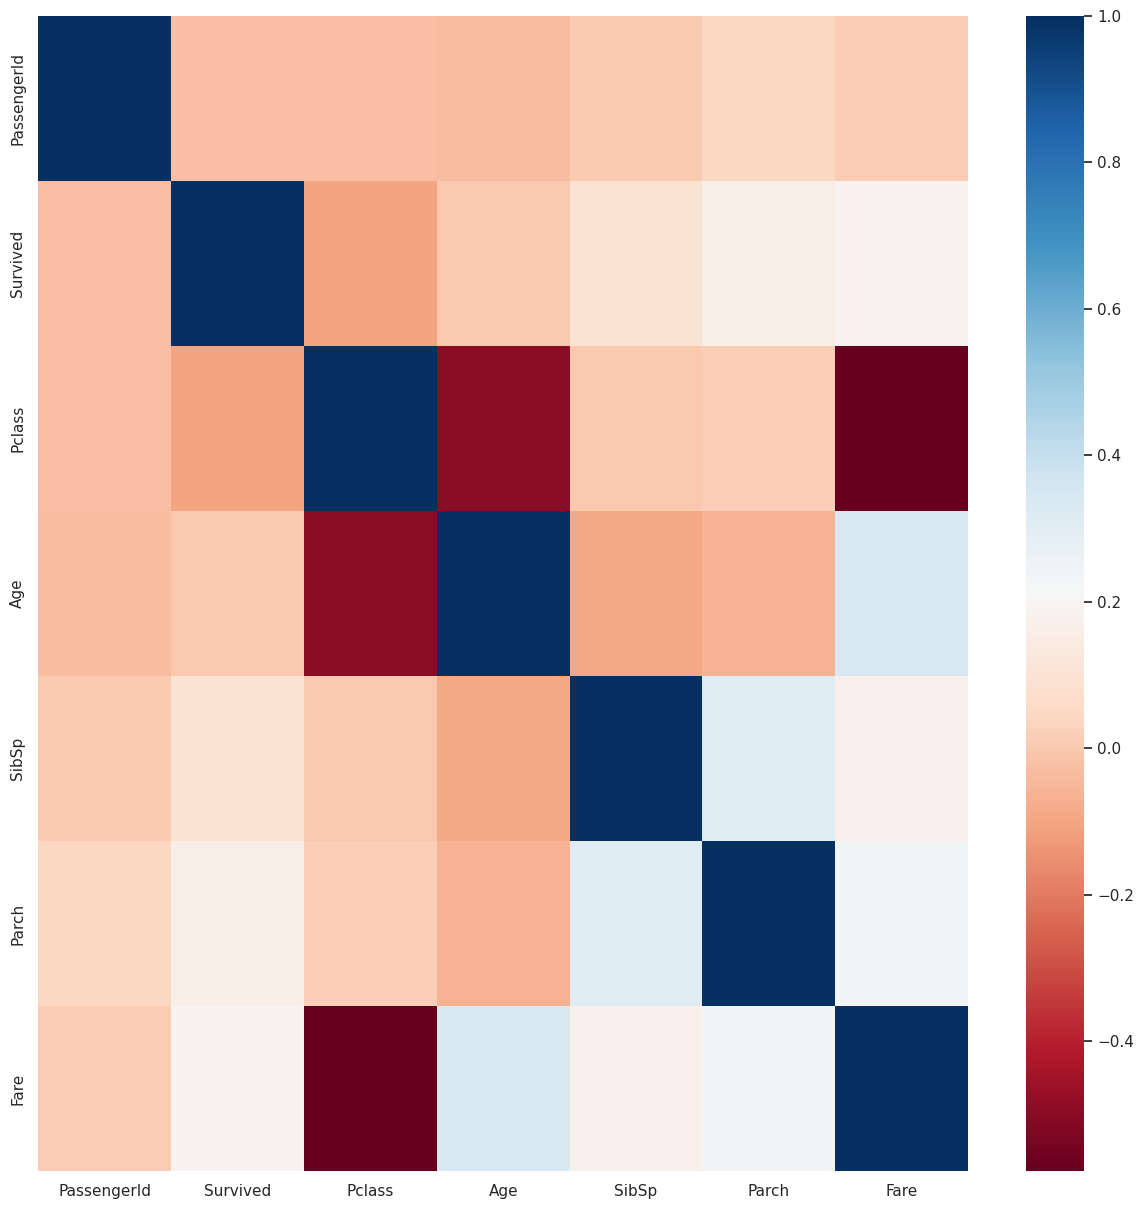

[]

In [17]:
high_correlated_cols(df, plot=True, corr_th=0.90)